In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import*
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

/home/nuru/.local/share/virtualenvs/deepLearn-tC2glvHT/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = 'data/train'
validation_path = 'data/validation'
test_path = 'data/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(64,64),classes=['cropland','building','uncultivatedLand'],batch_size=50)
validation_batches = ImageDataGenerator().flow_from_directory(validation_path,target_size=(64,64),classes=['cropland','building','uncultivatedLand'],batch_size=30)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(64,64),classes=['cropland','building','uncultivatedLand'],batch_size=30)

Found 900 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [4]:
def plots (ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type (ims [0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) %2 == 0 else len(ims)//rows + 1
    for i in range (len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

In [6]:
#plots(imgs, titles=labels)

# BUILD AND TRAIN THE CNN

In [7]:
from keras import layers
from keras import models
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
                                                                    
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [10]:
model.compile(Adam (lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit_generator(train_batches, steps_per_epoch=18, validation_data=validation_batches, validation_steps=15, epochs=25, verbose=2)

Epoch 1/25
 - 173s - loss: 1.4119 - acc: 0.6933 - val_loss: 1.1268 - val_acc: 0.5489
Epoch 2/25
 - 165s - loss: 0.4258 - acc: 0.7900 - val_loss: 1.0922 - val_acc: 0.6467
Epoch 3/25
 - 163s - loss: 0.3217 - acc: 0.8478 - val_loss: 0.9235 - val_acc: 0.6289
Epoch 4/25
 - 166s - loss: 0.2551 - acc: 0.8911 - val_loss: 1.0255 - val_acc: 0.6422
Epoch 5/25
 - 164s - loss: 0.2358 - acc: 0.9089 - val_loss: 1.0211 - val_acc: 0.6222
Epoch 6/25
 - 164s - loss: 0.2089 - acc: 0.9189 - val_loss: 1.2035 - val_acc: 0.6556
Epoch 7/25
 - 166s - loss: 0.2082 - acc: 0.9189 - val_loss: 1.1339 - val_acc: 0.6444
Epoch 8/25
 - 163s - loss: 0.1959 - acc: 0.9200 - val_loss: 1.2421 - val_acc: 0.6378
Epoch 9/25
 - 166s - loss: 0.1902 - acc: 0.9189 - val_loss: 1.3613 - val_acc: 0.6044
Epoch 10/25
 - 164s - loss: 0.2061 - acc: 0.9156 - val_loss: 1.0577 - val_acc: 0.5889
Epoch 11/25
 - 165s - loss: 0.2153 - acc: 0.9100 - val_loss: 1.1563 - val_acc: 0.6022
Epoch 12/25
 - 167s - loss: 0.1402 - acc: 0.9533 - val_loss: 1.

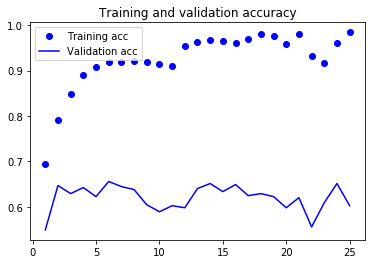

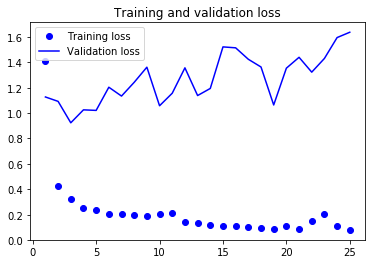

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
#model.summary()

# making the predictions

In [14]:
test_labels = test_batches.classes

In [15]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
predictions = model.predict_generator(test_batches, steps=15, verbose=0)

In [17]:
predictions

array([[1.4053892e-02, 9.7695845e-01, 8.9876140e-03],
       [3.6404278e-02, 9.4765115e-01, 1.5944550e-02],
       [5.1078850e-01, 3.0145177e-01, 1.8775973e-01],
       ...,
       [5.2778202e-01, 1.1145070e-04, 4.7210646e-01],
       [2.7508128e-01, 3.3870700e-03, 7.2153169e-01],
       [4.8723686e-01, 2.9042432e-01, 2.2233886e-01]], dtype=float32)

In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    '''This fnctn prints and plots cm, normalization can be applied by setting 'normalize=True'. ''' 
    plt.imshow (cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix Without Normalization')
    print(cm)
    
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment="center", color="white" if cm [i,j]>thresh else "black")
    
    plt.tight_layout
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [20]:
test_batches.class_indices

{'building': 1, 'cropland': 0, 'uncultivatedLand': 2}

Confusion Matrix Without Normalization
[[67 37 53]
 [76 24 50]
 [62 42 39]]


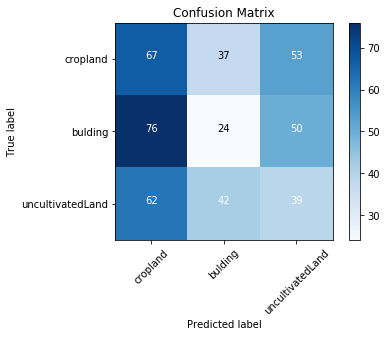

In [21]:
cm_plot_labels = ['cropland', 'bulding', 'uncultivatedLand']
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')

In [22]:
from sklearn.metrics import classification_report

In [23]:
target_names = ['building', 'cropland', 'uncultivatedLand']
print(classification_report(test_labels, predictions.argmax(axis=1), target_names=target_names))

                  precision    recall  f1-score   support

        building       0.33      0.43      0.37       157
        cropland       0.23      0.16      0.19       150
uncultivatedLand       0.27      0.27      0.27       143

     avg / total       0.28      0.29      0.28       450

